<a href="https://colab.research.google.com/github/lgeralas/Examen1/blob/main/consumer_mit_lift_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
#importar librerias pandas, numpy y matplotlib
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
 #cargar archivo csv desde equipo 
from google.colab import files 
files.upload()

In [41]:
#Carga desde un archivo .csv sin indice
consumer = pd.read_excel('consumer_mit_lift_lab.xlsx')

In [42]:
#Verificamos info del Data Frame
consumer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 36 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   _record_id                                115 non-null    object 
 1   _title                                    115 non-null    object 
 2   _server_updated_at                        115 non-null    object 
 3   _updated_by                               115 non-null    object 
 4   _geometry                                 115 non-null    object 
 5   _latitude                                 115 non-null    float64
 6   _longitude                                115 non-null    float64
 7   282_payment_method_that_purchase          115 non-null    object 
 8   283_fulfill_needs                         115 non-null    object 
 9   300_did_not_find                          6 non-null      object 
 10  237_distance_household_interviewee    

In [43]:
#Identificar valores nulos por columna
valores_nulos=consumer.isnull().sum()
valores_nulos

_record_id                                    0
_title                                        0
_server_updated_at                            0
_updated_by                                   0
_geometry                                     0
_latitude                                     0
_longitude                                    0
282_payment_method_that_purchase              0
283_fulfill_needs                             0
300_did_not_find                            109
237_distance_household_interviewee            0
299_means_transportation_consumer             0
238_frequency_buying_store                    0
284_additional_products_store               111
301_electricity_bill                          0
305_electricity_bill_store                    7
302_water_bill                                0
306_water_bill_store                          4
303_gas_bill                                  0
307_gas_bill_store                            3
286_topups                              

In [44]:
#Eliminamos esta la columna 300_did_not_find ya que no proporciona suficiente información y además no afecta la recaudación de datos
consumer= consumer.drop(["300_did_not_find"], axis=1)

#De igual forma eliminamos la columna de 284_additional_products_store, ya que no contiene información suficiente para que esta sea utilizada en el análisis de datos
consumer= consumer.drop(["284_additional_products_store"], axis=1)


In [45]:
#Sustituir los valores nulos de 305_electricity_bill_store, por una string que identifique que este espacio no fue rellenado
consumer['305_electricity_bill_store']=consumer['305_electricity_bill_store'].fillna('No proporcionado')

#Sustituir los valores nulos de 306_water_bill_store, por una string que identifique que este espacio no fue rellenado
consumer['306_water_bill_store']=consumer['306_water_bill_store'].fillna('No proporcionado')



In [51]:
#Sustituir valores nulos en 308_topups_in_store y en 306_water_bill_store por valores no nulos hacia adelante, esto ya que esta columna no cuenta con muchos datos vacios y pueden ser rellenados hacia adelante
consumer['306_water_bill_store']=consumer['306_water_bill_store'].fillna(method='ffill')
consumer['307_gas_bill_store']=consumer['307_gas_bill_store'].fillna(method='ffill')
consumer['309_wiretransfers_in_store']=consumer['309_wiretransfers_in_store'].fillna(method='ffill')
consumer['308_topups_in_store']=consumer['308_topups_in_store'].fillna(method='ffill')

In [47]:
#Sustituir los valores nulos de 306_water_bill_store, por una string que identifique que este espacio no fue rellenado
consumer['storefront_picture_just_once_if_possible']=consumer['storefront_picture_just_once_if_possible'].fillna('Foto no proporcionada')



In [48]:
#Eliminamos esta la columna 304_additional_services_store ya que no proporciona suficiente información y además no afecta la recaudación de datos
consumer= consumer.drop(["304_additional_services_store"], axis=1)

In [59]:
#Identificar valores nulos por columna
valores_nulos=consumer.isnull().sum()
valores_nulos

_record_id                                  0
_title                                      0
_server_updated_at                          0
_updated_by                                 0
_geometry                                   0
_latitude                                   0
_longitude                                  0
282_payment_method_that_purchase            0
283_fulfill_needs                           0
237_distance_household_interviewee          0
299_means_transportation_consumer           0
238_frequency_buying_store                  0
301_electricity_bill                        0
305_electricity_bill_store                  0
302_water_bill                              0
306_water_bill_store                        0
303_gas_bill                                0
307_gas_bill_store                          0
286_topups                                  0
308_topups_in_store                         0
287_wire_transfers                          0
309_wiretransfers_in_store        

<Figure size 1080x576 with 0 Axes>

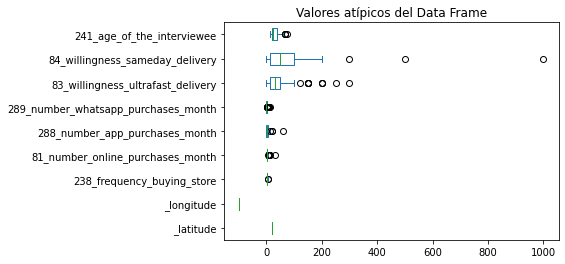

In [53]:
#Realizamos diagrama de caja o bigote de cada columna del data frame para tener una vista de los outliers de cada valor
fig=plt.figure(figsize=(15,8))
consumer.plot(kind='box',vert=False)
plt.title('Valores atípicos del Data Frame')
plt.show () #dibujamos el diagrama

In [54]:
#Método aplicando desviación estandar. Encuentra los valores extremos 
y=consumer
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print('Limite superior permitido', Limite_Superior)
print('Limite inferior permitido', Limite_Inferior)

Limite superior permitido _latitude                               19.110143
_longitude                             -98.092103
238_frequency_buying_store               6.315174
81_number_online_purchases_month        13.640687
288_number_app_purchases_month          23.607792
289_number_whatsapp_purchases_month      8.188708
83_willingness_ultrafast_delivery      208.723621
84_willingness_sameday_delivery        404.146007
241_age_of_the_interviewee              72.249359
dtype: float64
Limite inferior permitido _latitude                               18.985154
_longitude                             -98.351215
238_frequency_buying_store              -2.280392
81_number_online_purchases_month        -8.405904
288_number_app_purchases_month         -16.477357
289_number_whatsapp_purchases_month     -5.927839
83_willingness_ultrafast_delivery     -112.114925
84_willingness_sameday_delivery       -262.041659
241_age_of_the_interviewee             -12.075446
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


In [55]:
#Encontramos outliers del Dataframe
outliers= consumer[(y>Limite_Superior)|(y<Limite_Inferior)]

#Obtenemos datos limpios y los outliers se convertiran en nulos en el Dataframe de los valores numéricos
data3=consumer[(y<=Limite_Superior)&(y>=Limite_Inferior)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """


In [65]:
#eliminamos columnas innecesarias que marcan los valores nulos en el programa 
data3= consumer.drop(['_record_id','_title', '_server_updated_at', '_updated_by','_geometry', '282_payment_method_that_purchase', '283_fulfill_needs', '237_distance_household_interviewee', '299_means_transportation_consumer', '301_electricity_bill', '305_electricity_bill_store', '302_water_bill', '306_water_bill_store', '303_gas_bill', '307_gas_bill_store', '286_topups', '308_topups_in_store', '287_wire_transfers','309_wiretransfers_in_store', '320_other_services_in_store', '240_gender_interviewee', 'indicate_the_type_of_store', 'name_of_the_store', 'storefront_picture_just_once_if_possible' ], axis=1)
data3

,_latitude,_longitude,238_frequency_buying_store,81_number_online_purchases_month,288_number_app_purchases_month,289_number_whatsapp_purchases_month,83_willingness_ultrafast_delivery,84_willingness_sameday_delivery,241_age_of_the_interviewee
0,19.059841,-98.234980,1,1,0,0,0,0,35
1,19.058479,-98.233566,1,1,2,0,35,50,27
2,19.062077,-98.230339,1,0,0,0,40,25,42
3,19.055535,-98.232916,1,2,3,0,0,0,27
4,19.059012,-98.232994,1,2,5,0,0,50,35
...,...,...,...,...,...,...,...,...,...
110,19.035224,-98.267100,1,15,10,0,100,100,15
111,19.035280,-98.267856,1,1,1,0,50,70,21
112,19.035451,-98.267862,1,3,2,0,0,0,18
113,19.035486,-98.267831,1,2,4,0,30,100,18


In [74]:
#Unimos la columna 'indice_tiempo' con el data frame
strings=consumer[['_record_id','_title', '_server_updated_at', '_updated_by','_geometry', '282_payment_method_that_purchase', '283_fulfill_needs', '237_distance_household_interviewee', '299_means_transportation_consumer', '301_electricity_bill', '305_electricity_bill_store', '302_water_bill', '306_water_bill_store', '303_gas_bill', '307_gas_bill_store', '286_topups', '308_topups_in_store', '287_wire_transfers','309_wiretransfers_in_store', '320_other_services_in_store', '240_gender_interviewee', 'indicate_the_type_of_store', 'name_of_the_store', 'storefront_picture_just_once_if_possible']]
Datos_limpios=pd.concat([strings, data3], axis=1)
Datos_limpios

,_record_id,_title,_server_updated_at,_updated_by,_geometry,282_payment_method_that_purchase,283_fulfill_needs,237_distance_household_interviewee,299_means_transportation_consumer,301_electricity_bill,...,storefront_picture_just_once_if_possible,_latitude,_longitude,238_frequency_buying_store,81_number_online_purchases_month,288_number_app_purchases_month,289_number_whatsapp_purchases_month,83_willingness_ultrafast_delivery,84_willingness_sameday_delivery,241_age_of_the_interviewee
0,060a856c-e3b8-41a7-b680-9756172d1c29,"November 12, 2022",2022-11-12 22:43:08 UTC,Ulises Núñez Bautista,SRID=4326;POINT(-98.2349802856 19.0598413203),Efectivo,no,0 a 3 cuadras,A pie,Tienda de conveniencia (e.g. OXXO),...,Foto no proporcionada,19.059841,-98.234980,1,1,0,0,0,0,35
1,c42fdf22-b93b-443e-8f46-6043613cb0c3,"November 12, 2022",2022-11-12 22:15:02 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2335660729 19.05847939),Efectivo,yes,7 a 10 cuadras,A pie,Tienda de conveniencia (e.g. OXXO),...,Foto no proporcionada,19.058479,-98.233566,1,1,2,0,35,50,27
2,3ccaedc0-949e-4555-afad-b2e1d77c3219,"November 12, 2022",2022-11-12 22:15:02 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2303385023 19.0620767997),Efectivo,yes,más de 10 cuadras,Automóvil,CFE,...,1 Photo,19.062077,-98.230339,1,0,0,0,40,25,42
3,91d8a240-af2c-451b-900f-3480f82e05db,"November 12, 2022",2022-11-12 20:41:38 UTC,Jorge Alberto Ostorga Flores,SRID=4326;POINT(-98.2329163449 19.0555346049),Tarjeta de débito y/o crédito,yes,4 a 6 cuadras,Motocicleta,Supermercado,...,1 Photo,19.055535,-98.232916,1,2,3,0,0,0,27
4,3efefc56-bd45-4e4a-bf02-ab725e9fb41a,"November 12, 2022",2022-11-12 19:49:13 UTC,Jorge Alberto Ostorga Flores,SRID=4326;POINT(-98.2329944224 19.0590117522),Efectivo,yes,más de 10 cuadras,Transporte público,CFE,...,1 Photo,19.059012,-98.232994,1,2,5,0,0,50,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,ee7ac407-4767-47b1-93b3-d7e09b49faec,"November 3, 2022",2022-11-03 20:15:32 UTC,Daniel Serrano,SRID=4326;POINT(-98.2671002671 19.0352236761),Efectivo,yes,20 min,Automóvil,No lo hago,...,1 Photo,19.035224,-98.267100,1,15,10,0,100,100,15
111,f65a8190-df80-440e-83bc-2639decfffd0,"November 3, 2022",2022-11-03 20:05:31 UTC,Daniel Serrano,SRID=4326;POINT(-98.2678556442 19.0352804088),Efectivo,yes,30 min,Transporte público,No lo hago,...,1 Photo,19.035280,-98.267856,1,1,1,0,50,70,21
112,70f42238-83b5-4a16-9f2e-a758efb8afb0,"November 3, 2022",2022-11-03 20:04:35 UTC,Fernando Gonzálezinactivo,SRID=4326;POINT(-98.2678617 19.0354511),Efectivo,yes,0 a 3 cuadras,A pie,No lo hago,...,1 Photo,19.035451,-98.267862,1,3,2,0,0,0,18
113,e4727f46-797f-4344-b183-0deeed11750f,"November 3, 2022",2022-11-03 20:04:34 UTC,Fernando Gonzálezinactivo,SRID=4326;POINT(-98.2678314 19.0354858),Efectivo,yes,más de 10 cuadras,Didi,No lo hago,...,1 Photo,19.035486,-98.267831,1,2,4,0,30,100,18


In [75]:
#Identificar valores nulos por columna
valores_nulos=Datos_limpios.isnull().sum()
valores_nulos

_record_id                                  0
_title                                      0
_server_updated_at                          0
_updated_by                                 0
_geometry                                   0
282_payment_method_that_purchase            0
283_fulfill_needs                           0
237_distance_household_interviewee          0
299_means_transportation_consumer           0
301_electricity_bill                        0
305_electricity_bill_store                  0
302_water_bill                              0
306_water_bill_store                        0
303_gas_bill                                0
307_gas_bill_store                          0
286_topups                                  0
308_topups_in_store                         0
287_wire_transfers                          0
309_wiretransfers_in_store                  0
320_other_services_in_store                 0
240_gender_interviewee                      0
indicate_the_type_of_store        

In [76]:
#Convertir Dataframe a CSV
Datos_limpios.to_csv('Datos_limpios_consumer_mit.csv')

#descargar archivo filtrado en csv
from google.colab import files

files.download('Datos_limpios_consumer_mit.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>